In [2]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_excel('data/可利霉素_ch_检验1.xlsx')
df2 = pd.read_excel('data/可利霉素_ch_检验2.xlsx')
for col in df2.columns:
    if col in df1.columns:
        rename_col = col + '_wkyc_rename'
        df2.rename(columns={col: rename_col}, inplace=True)
df = pd.concat([df1, df2], axis=1)
df.head()

,编号,住院号,入院时间,备注,出院时间,死亡时间,姓名,入院时间.1,新冠,WBC,...,HSTNI.4,PCT.4,CRP.4,血沉.4,IL6.4,氧浓度.4,氧分压.4,二氧化碳分压.4,PH.4,氧合指数.4
0,1,1765323,2022-12-28,NaN,2023-01-12,2023-01-12,李克勤,2022-12-28,1.0,12.15,...,288.7,11.56,NaN,NaN,378,NaN,NaN,NaN,NaN,NaN
1,2,1765586,2022-12-29,NaN,2023-01-11,2023-01-11,陈忠德,2022-12-18,1.0,5.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1598484,2021-10-20,NaN,2021-10-25,2021-10-25,万厚贤,2021-09-14,0.0,4.66,...,30.6,2.32,NaN,NaN,>5000,NaN,NaN,NaN,NaN,NaN
3,4,1825009,2023-05-25,NaN,2023-07-06,NaT,马益宏,2023-05-25,1.0,2.10,...,NaN,1.1,NaN,NaN,14.8,NaN,NaN,NaN,NaN,"{\n ""Th/Ts"": [\n ""0.37"",\n ""2..."
4,5,1594955,2021-10-12,NaN,2021-11-22,NaT,玉梅,2021-10-12,0.0,32.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{\n ""NK细胞"": [\n ""2.27"",\n ""20..."


In [4]:
df.shape

(112, 382)

In [5]:
df.columns

Index(['编号', '住院号', '入院时间', '备注', '出院时间', '死亡时间', '姓名', '入院时间.1', '新冠', 'WBC',
       ...
       'HSTNI.4', 'PCT.4', 'CRP.4', '血沉.4', 'IL6.4', '氧浓度.4', '氧分压.4',
       '二氧化碳分压.4', 'PH.4', '氧合指数.4'],
      dtype='object', length=382)

In [6]:
time_patterm_sequence = [
    "入院时间",
    "入ICU时间",
    "可利霉素前24小时",
    "可后D2",
    "可后D3-D4",
    "可后D5-D6",
    "可后D7-D8",
    "结束可利霉素时间",
    "出院时间"
]

result = {}
for pattern in time_patterm_sequence:
    result[pattern] = []

In [7]:
target_quota = "L"
def reset(d: dict):
    for k in d:
        d[k] = True

state_dict = {}
for k in time_patterm_sequence:
    state_dict[k] = True

for i, row in df.iterrows():
    now_time = None
    reset(state_dict)
    for col in df.columns:
        for pattern in time_patterm_sequence:
            if col.startswith(pattern):
                now_time = pattern
                break
        if now_time is not None and state_dict[now_time]:
            if col.startswith(target_quota):
                print(i, now_time, col, df.loc[i, col])
                if not pd.isna(row[col]):
                    try:
                        value = float(row[col])
                        result[now_time].append(value)
                    except Exception as e:
                        print(row[col])
                        print(e)
                    state_dict[now_time] = False

0 入院时间 L 0.36
0 入ICU时间 L.1 0.36
0 可利霉素前24小时 L.2 0.4
0 可后D2 L.3 0.2
0 可后D3-D4 L_wkyc_rename 0.6
0 可后D5-D6 L.1_wkyc_rename 0.6
0 可后D7-D8 L.2_wkyc_rename 1.18
0 结束可利霉素时间 L.3_wkyc_rename 0.2
0 出院时间 L.4 1.62
1 入院时间 L 0.65
1 入ICU时间 L.1 nan
1 可利霉素前24小时 L.2 nan
1 可后D2 L.3 0.5
1 可后D3-D4 L_wkyc_rename 0.5
1 可后D5-D6 L.1_wkyc_rename 0.8
1 可后D7-D8 L.2_wkyc_rename 0.3
1 结束可利霉素时间 L.3_wkyc_rename 0.3
1 出院时间 L.4 nan
2 入院时间 L 0.68
2 入ICU时间 L.1 0.8
2 可利霉素前24小时 L.2 0.4
2 可后D2 L.3 0.2
2 可后D3-D4 L_wkyc_rename 0.3
2 可后D5-D6 L.1_wkyc_rename 0.6
2 可后D7-D8 L.2_wkyc_rename 0.56
2 结束可利霉素时间 L.3_wkyc_rename 0.81
2 出院时间 L.4 0.98
3 入院时间 L 0.43
3 入ICU时间 L.1 0.4
3 可利霉素前24小时 L.2 0.7
3 可后D2 L.3 0.4
3 可后D3-D4 L_wkyc_rename 0.5
3 可后D5-D6 L.1_wkyc_rename 0.4
3 可后D7-D8 L.2_wkyc_rename 0.4
3 结束可利霉素时间 L.3_wkyc_rename 0.4
3 出院时间 L.4 2.4
4 入院时间 L 0.44
4 入ICU时间 L.1 nan
4 可利霉素前24小时 L.2 0.7
4 可后D2 L.3 0.6
4 可后D3-D4 L_wkyc_rename nan
4 可后D5-D6 L.1_wkyc_rename 0.5
4 可后D7-D8 L.2_wkyc_rename nan
4 结束可利霉素时间 L.3_wkyc_rename 0.9
4 出院时间 L.

In [8]:
result

{'入院时间': [0.36,
  0.65,
  0.68,
  0.43,
  0.44,
  0.1,
  0.53,
  0.5,
  1.01,
  0.67,
  0.6,
  0.2,
  0.18,
  1.09,
  0.3,
  0.41,
  0.9,
  0.43,
  0.3,
  0.5,
  0.85,
  2.1,
  0.9,
  0.39,
  1.9,
  0.25,
  1.92,
  1.02,
  0.6,
  1.21,
  0.99,
  1.1,
  0.6,
  0.6,
  0.65,
  1.84,
  0.49,
  0.16,
  0.62,
  0.26,
  0.59,
  0.47,
  2.41,
  0.64,
  0.2,
  2.38,
  2.14,
  1.6,
  0.2,
  0.7,
  0.8,
  0.68,
  0.4,
  0.9,
  0.51,
  0.8,
  0.65,
  0.4,
  0.57,
  0.9,
  0.46,
  1.48,
  1.96,
  1.0,
  0.45,
  0.18,
  0.71,
  0.3,
  0.3,
  7.0,
  0.6,
  1.5,
  0.65,
  0.6,
  0.9,
  0.9,
  0.21,
  1.7,
  1.0,
  1.01,
  1.29],
 '入ICU时间': [0.36,
  0.8,
  0.4,
  0.1,
  0.53,
  0.2,
  1.01,
  0.67,
  0.6,
  0.2,
  0.18,
  1.09,
  0.3,
  0.41,
  0.9,
  0.7,
  0.3,
  0.5,
  1.01,
  0.8,
  0.98,
  0.39,
  0.4,
  0.2,
  0.25,
  1.92,
  1.02,
  0.1,
  0.6,
  1.21,
  0.3,
  0.66,
  0.8,
  1.1,
  0.5,
  1.53,
  0.9,
  1.0,
  0.8,
  0.7,
  0.3,
  0.8,
  0.2,
  0.68,
  0.6,
  0.16,
  0.8,
  0.59,
  2.41,
  0.64

In [9]:
time = []
metric = []
for k, v in result.items():
    for u in v:
        time.append(k)
        metric.append(u)
len(metric)

539

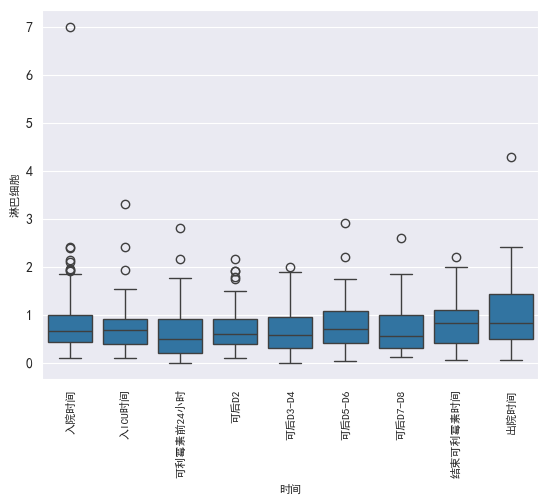

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['simhei']  # 用来正常显示中文标签SimHei
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号




# 创建一个 DataFrame
data = pd.DataFrame({'时间': time, '淋巴细胞': metric})

# 使用 seaborn 绘制箱形图
sns.boxplot(x='时间', y='淋巴细胞', data=data, width=0.8)

plt.xlabel('时间', fontsize=8)
plt.ylabel('淋巴细胞', fontsize=8)
plt.xticks(rotation=90, fontsize=8)

# 显示图形
plt.show()

In [11]:
data.to_csv('data/淋巴细胞数据_2.csv', index=False)